In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


In [41]:
# !wget https://raw.githubusercontent.com/mtfr1/FIFA19-dataset/master/data.csv --quiet
df = pd.read_csv('data.csv')

In [42]:

features = ['Name','Position', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle']
numeric_features = ['Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle']

### PCA


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

df_pca = df[df['Position']!= 'GK']

df_cluster = df[df['Position']!= 'GK']

df_pca = df_pca[features].dropna()
df_cluster = df_cluster[features].dropna()
df_pca = df_pca[df_pca.columns.difference(['Name','Position'])]

#Normalizando os valores
df_pca_std = sc.fit_transform(df_pca.values) 
#Gerando matriz de covariancia
cov_mat = np.cov(df_pca_std.T)
#Computando auto vetores e respectivos autovetores 
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)


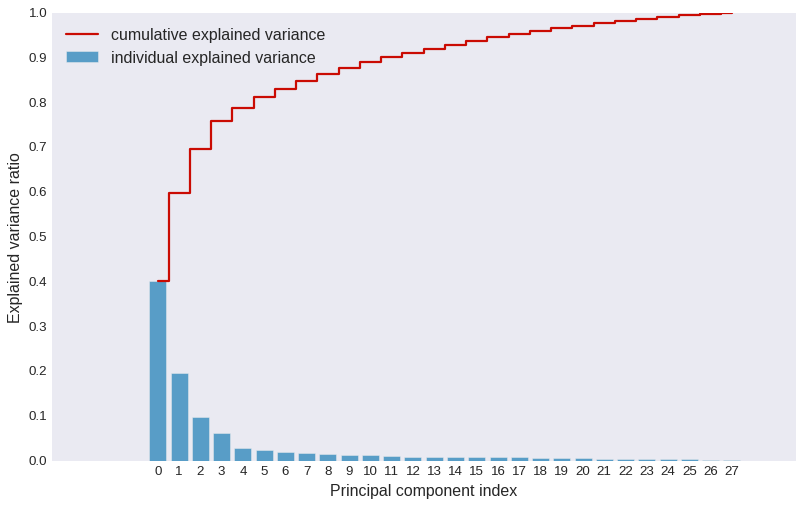

In [94]:
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size

# calculate cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
var_exp =  np.round(var_exp,3)
eigen_vecs
# plot explained variances
plt.bar(range(0,28), var_exp, alpha=0.8,
        align='center', label='individual explained variance')
plt.step(range(0,28), cum_var_exp, where='mid',
         label='cumulative explained variance',color="r")
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
# labels = 1:29
plt.xticks(np.arange(0, 28, step=1))
plt.yticks(np.arange(0, 1.1, step=.1))

# labels
plt.show()

In [52]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
#Ordenando os autovetores em ordem decrescente em relacao aos respectivos autovalores
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
#Podemos aumentar a quantidade de autovalores para melhorar a variancia capturada
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis],eigen_pairs[2][1][:, np.newaxis],eigen_pairs[3][1][:, np.newaxis],eigen_pairs[4][1][:, np.newaxis],eigen_pairs[5][1][:, np.newaxis],eigen_pairs[6][1][:, np.newaxis],eigen_pairs[7][1][:, np.newaxis]))


In [97]:
w.shape

(28, 8)

In [67]:
X = pd.DataFrame(df_pca.values.dot(w))
X

,0,1,2,3,4,5,6,7
0,-395.248196,-121.234083,29.863353,102.079669,22.653786,2.017456,-23.951296,-3.378589
1,-378.962437,-142.756687,6.606322,144.507015,20.717822,10.857094,-23.352415,-11.237141
2,-380.729072,-117.696809,38.587074,106.605427,13.916710,6.161361,-22.690705,9.214247
3,-369.955726,-180.057590,43.350882,90.552509,11.322414,31.209750,-17.659332,-1.111155
4,-377.080175,-126.039585,42.002207,105.634713,8.607696,6.635557,-17.537831,6.263886
...,...,...,...,...,...,...,...,...
16117,-182.645805,-103.286279,53.392633,77.464328,27.582613,-0.405219,-12.420150,3.956336
16118,-163.863780,-79.452340,-6.071166,88.220091,10.862427,3.848008,-0.972700,1.569434
16119,-189.964904,-61.370469,30.081923,103.826656,17.585744,4.850121,-11.427375,5.798331
16120,-196.323601,-61.143977,28.783973,79.432903,11.638949,9.528623,-15.506675,-6.054158


### Elbow

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9df2af810>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=False)

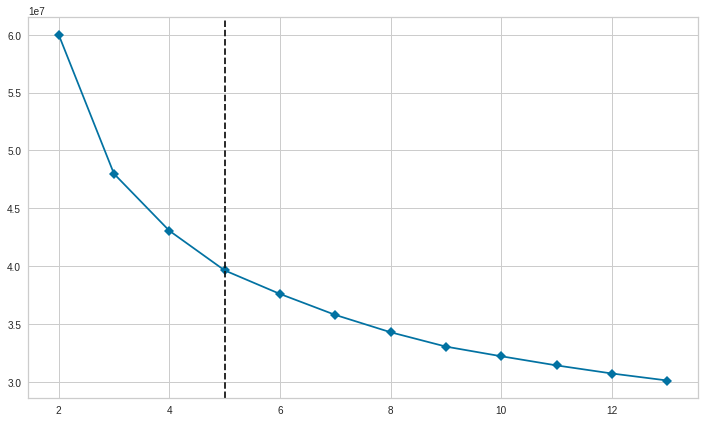

In [55]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,14),timings=False,metric='distortion' )

visualizer.fit(df_pca.values)        # Fit the data to the visualizer
# visualizer.show()        # Finalize and render the figure

### K-means

In [56]:
DEF = ['RB','CB','LB','SW','RWB','LWB','RCB','LCB']
MID = ['CM','LOM','ROM','OM','LCM','LM','RM','LWM','RWM','RW','LW','RCM']
MIDA = ['CAM','LAM','RAM']
MIDD = ['CDM','LDM','RDM']
ATK = ['LF','RF', 'ST', 'CF', 'RS', 'LS']

HM = ['High/ Medium']
LH = ['Medium/ High']


### Adicionando os grupos de cada posição

In [72]:

posit_group = []
for row in df_cluster['Position']:
   
    if(row in DEF ):
        posit_group.append('DEF')

    elif(row in MIDA ):
        posit_group.append('MID ATK')    

    elif(row in MIDD ):
        posit_group.append('MID DEF')    

    elif(row in MID):
        posit_group.append('MID')

    elif(row in ATK):
        posit_group.append('ATK')
    else:
        print(row)


X['Position Group'] = posit_group
X['Position'] = df_cluster['Position']
X['Name'] = df_cluster['Name']
X
X

,0,1,2,3,4,5,6,7,Position Group,Position,Name,Cluster
0,-395.248196,-121.234083,29.863353,102.079669,22.653786,2.017456,-23.951296,-3.378589,ATK,RF,L. Messi,3
1,-378.962437,-142.756687,6.606322,144.507015,20.717822,10.857094,-23.352415,-11.237141,ATK,ST,Cristiano Ronaldo,3
2,-380.729072,-117.696809,38.587074,106.605427,13.916710,6.161361,-22.690705,9.214247,MID,LW,Neymar Jr,3
3,-369.955726,-180.057590,43.350882,90.552509,11.322414,31.209750,-17.659332,-1.111155,MID,NaN,NaN,4
4,-377.080175,-126.039585,42.002207,105.634713,8.607696,6.635557,-17.537831,6.263886,ATK,RCM,K. De Bruyne,3
...,...,...,...,...,...,...,...,...,...,...,...,...
16117,-182.645805,-103.286279,53.392633,77.464328,27.582613,-0.405219,-12.420150,3.956336,MID,LB,E. Herrera,2
16118,-163.863780,-79.452340,-6.071166,88.220091,10.862427,3.848008,-0.972700,1.569434,ATK,CDM,J. Veyna,1
16119,-189.964904,-61.370469,30.081923,103.826656,17.585744,4.850121,-11.427375,5.798331,ATK,CM,M. Reinthaler,1
16120,-196.323601,-61.143977,28.783973,79.432903,11.638949,9.528623,-15.506675,-6.054158,MID,NaN,NaN,1


In [73]:
X_clust = X[X.columns.difference(['Name','Position','Cluster','Position Group'])]
num_clusters = 5
km = KMeans(n_clusters=num_clusters)
km.fit(X_clust)
clusters = km.labels_.tolist()
X['Cluster'] = clusters

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

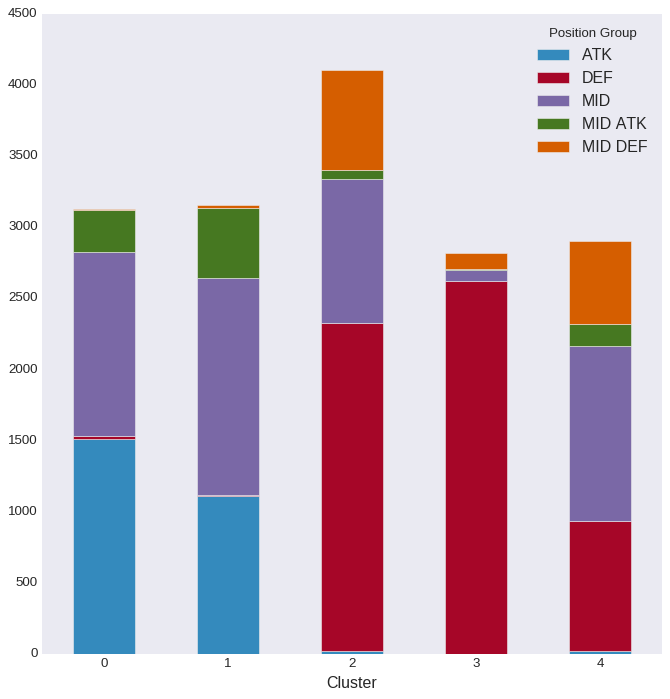

In [86]:
plt.style.use('seaborn-dark')
df_cluster['Cluster'] = clusters
gp_clusters = df_cluster.groupby('Cluster')
a = X.groupby(['Cluster','Position Group']).size()
a.unstack(level=-1).plot(kind='bar',stacked=True, figsize = (10,10))
plt.xticks(rotation=0)

